In [16]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import pyarrow.feather as feather
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
table_data = feather.read_table("C:\\Users\\bruno\\Desktop\\Diplomski\\one_df_trta_SYNC.feather")
edf = table_data.to_pandas()

In [8]:
edf.columns

Index(['EOG LOC-A2', 'EOG ROC-A2', 'EEG F3-A2', 'EEG F4-A1', 'EEG A1-A2',
       'EEG C3-A2', 'EEG C4-A1', 'EEG O1-A2', 'EEG O2-A1', 'EMG Chin',
       'Flow Patient-0', 'Flow Patient-1', 'Effort THO', 'Effort ABD',
       'Snore_x', 'ECG I', 'SpO2', 'PulseRate', 'Leg 1', 'Leg 2', 'Body',
       'Start', 'Epoch', 'Stage Name', 'Stage', 'timestamp',
       'Absolute Desaturation', 'Arousal', 'Bradycardia', 'Central Apnea',
       'Hypopnea', 'Leg Movement', 'Long RR', 'Mixed Apnea',
       'Obstructive Apnea', 'PTT Drop', 'Periodic Respiration',
       'Relative Desaturation', 'Snore_y', 'Tachycardia', 'Patient'],
      dtype='object')

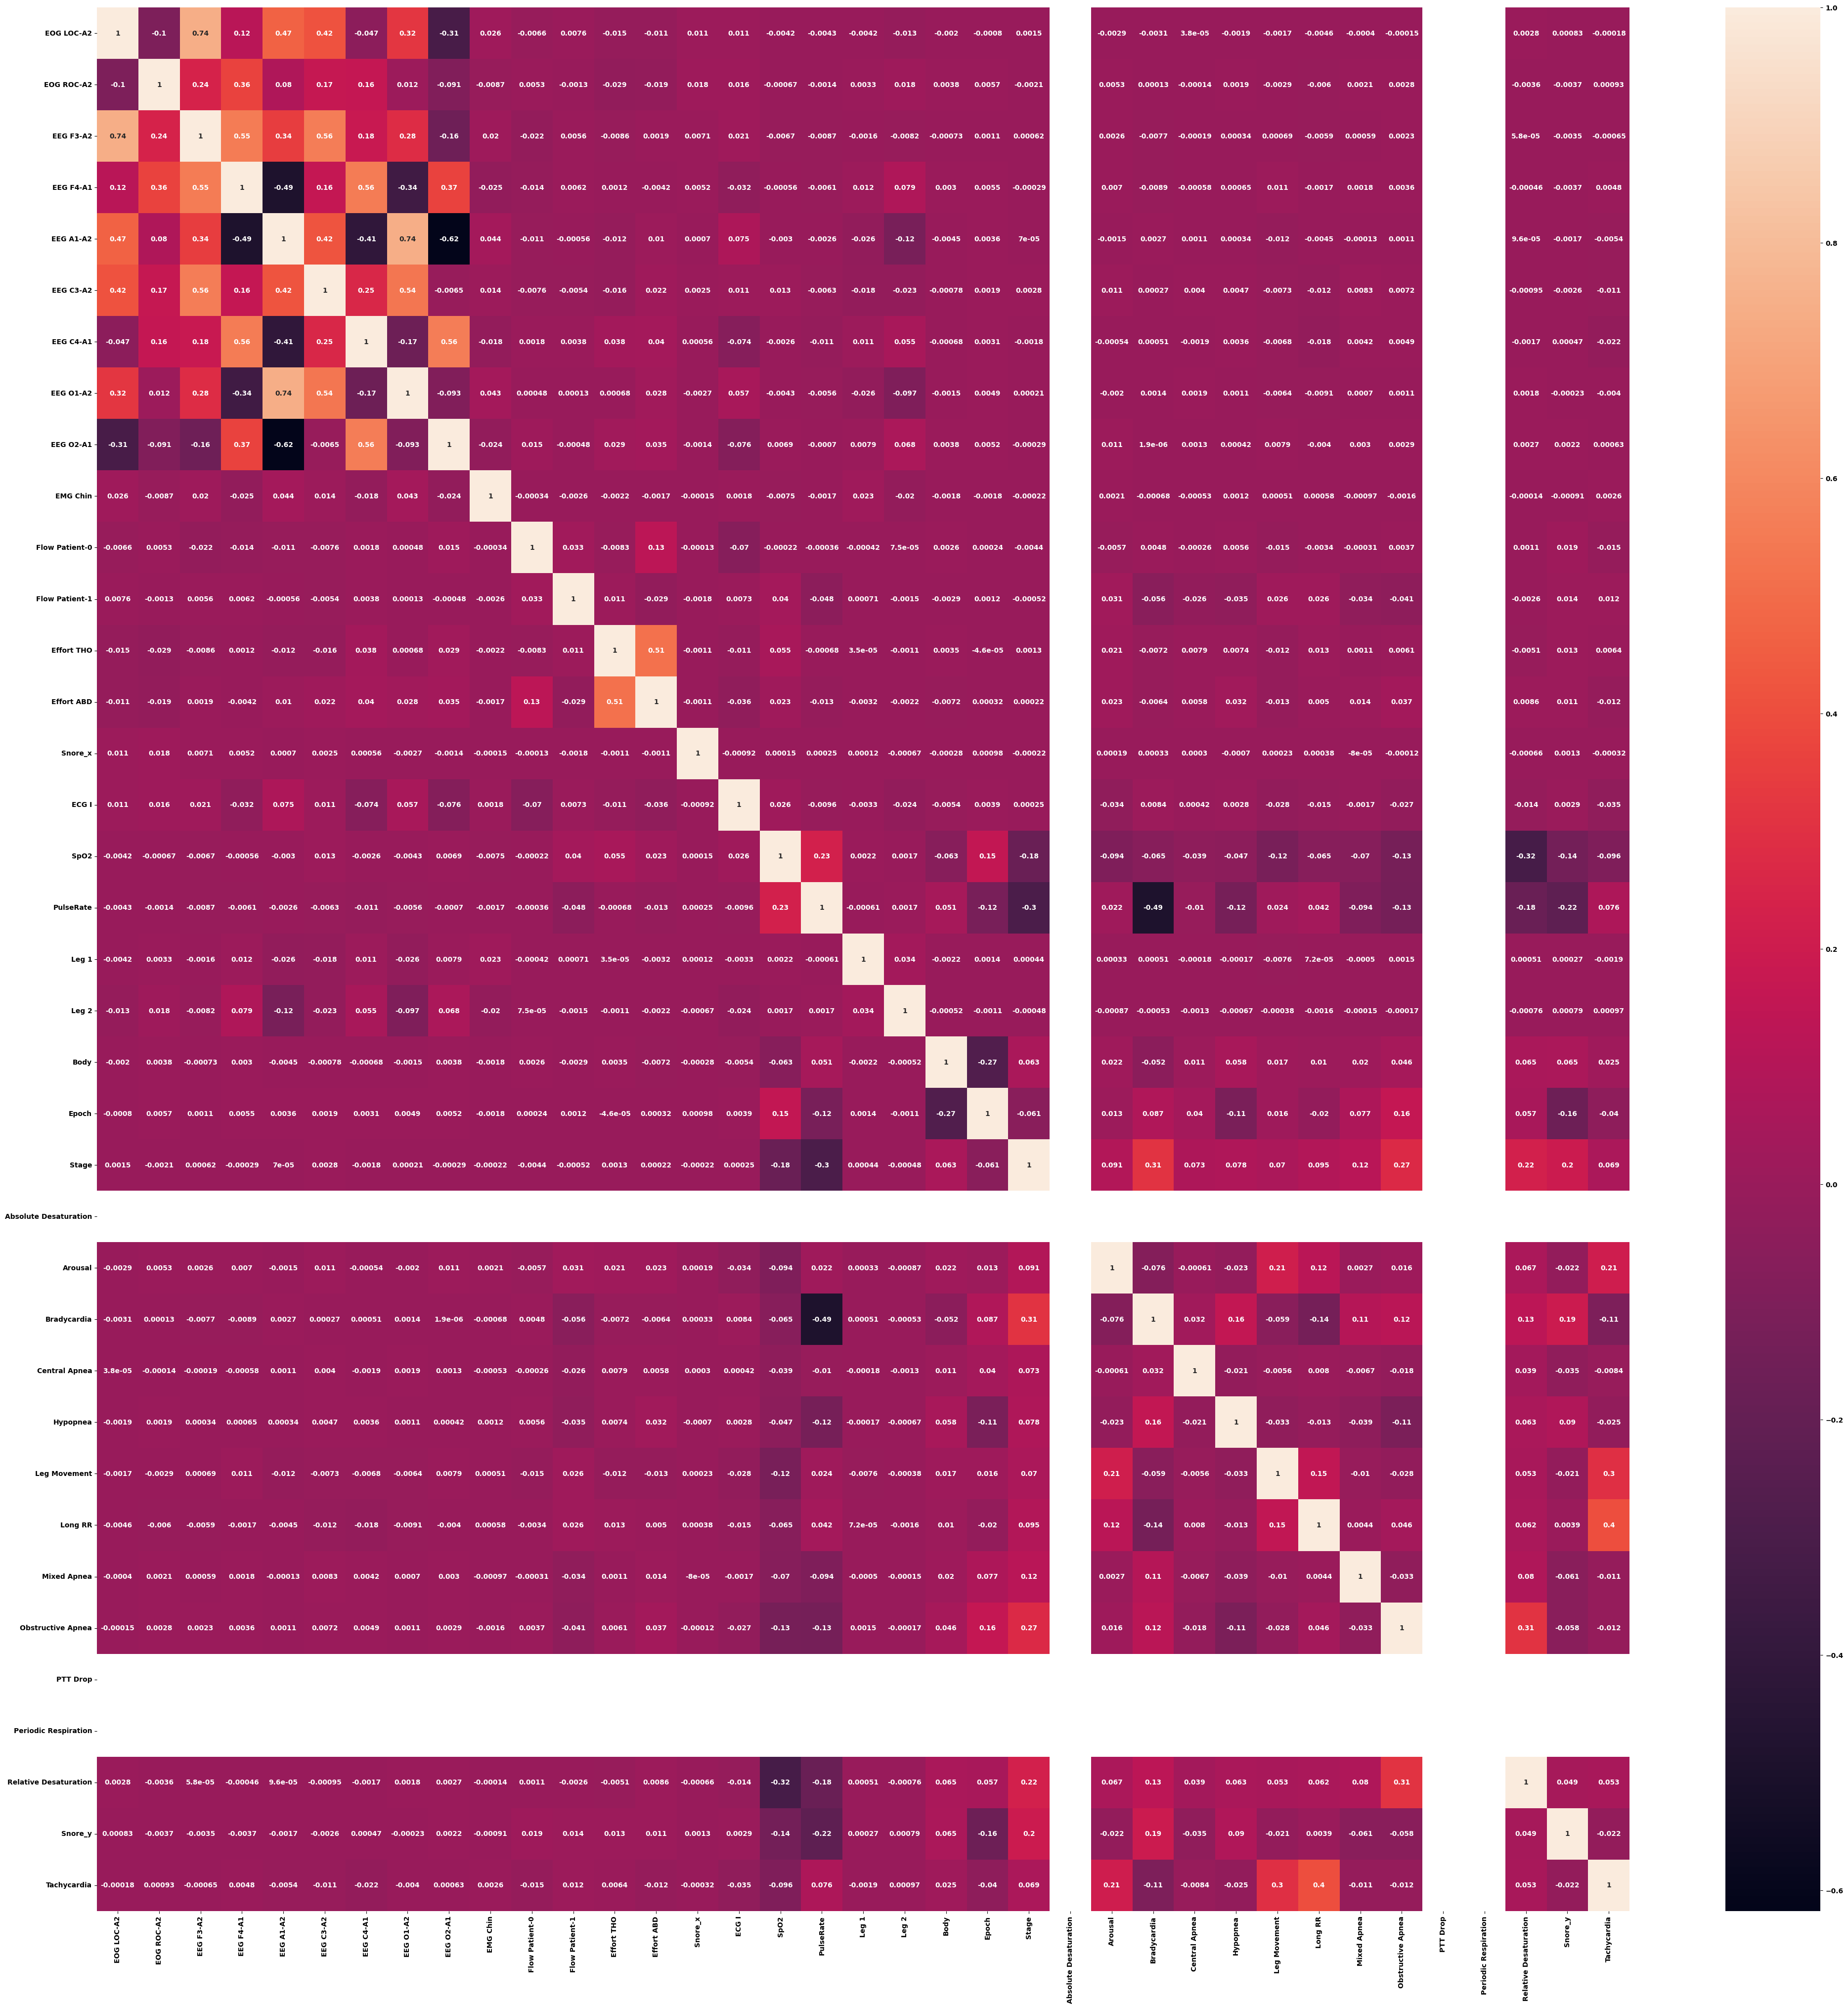

In [19]:
plt.figure(figsize=(50, 50))  # Adjust the width and height as needed
sns.heatmap(edf.sample(1000000).corr(numeric_only=True), annot=True)
plt.show()

In [26]:
label_encoder = LabelEncoder()
edf['sleep_phase_encoded'] = label_encoder.fit_transform(edf['Stage'])

features = edf[['SpO2', 'PulseRate', 'Snore_x']]
labels = edf['sleep_phase_encoded']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


In [ ]:
svm_classifier = SVC(kernel='sigmoid')  # Linear kernel
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))